#### 0923 복습

##### 1. displ의 4분위 수 출력

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import pydataset

In [4]:
mpg = pydataset.data("mpg")
mpg.rename({'class' : 'nclass'}, axis = 1, inplace = True)
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,nclass
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [5]:
print(mpg['displ'].quantile(1))
print(mpg['displ'].quantile(0.75))
print(mpg['displ'].quantile(0.5))
print(mpg['displ'].quantile(0.25))
print(mpg['displ'].quantile(0))

7.0
4.6
3.3
2.4
1.6


In [6]:
mpg['displ'].quantile([0.0, 0.25, 0.5, 0.75, 1.0])

0.00    1.6
0.25    2.4
0.50    3.3
0.75    4.6
1.00    7.0
Name: displ, dtype: float64

##### 2. 10초가 지나면 'retire'이 출력되게 하여라

In [7]:
import time

In [8]:
time.sleep(10)
print('retire')

retire


In [9]:
n = 3
while True:
    time.sleep(n)
    n -= 1
    if n == 0:
        print('retire')
        break

retire


##### 3. diamonds에서 carat에 따른 price를 color별로 그려보기 (산점도)

In [10]:
diamonds = pydataset.data('diamonds')
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


<AxesSubplot:xlabel='carat', ylabel='price'>

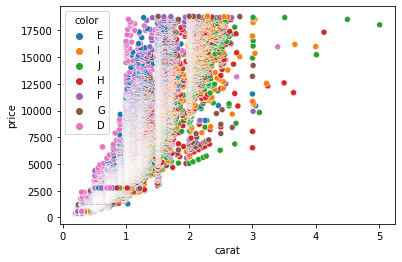

In [11]:
import seaborn as sns
sns.scatterplot(data = diamonds, x = 'carat', y = 'price', hue = 'color')

In [12]:
#carat의 데이터 타입을 정수로
diamonds['carat'] = diamonds['carat'].astype(int)
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  int32  
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(5), int32(1), int64(1), object(3)
memory usage: 4.3+ MB


In [13]:
#carat별 평균
diamonds.groupby('carat').mean()

,depth,table,price,x,y,z
carat,,,,,,
0,61.732477,57.208214,1632.640826,5.047323,5.055794,3.118780
1,61.774607,57.862398,7288.267538,6.823315,6.816617,4.209824
2,61.810549,58.301939,14846.948912,8.209967,8.211377,5.056698
3,62.417647,58.441176,14308.705882,9.295000,9.209706,5.772941
4,63.480000,60.000000,16458.000000,10.080000,9.998000,6.374000
5,65.500000,59.000000,18018.000000,10.740000,10.540000,6.980000


In [15]:
df_c = diamonds.groupby('carat').mean()

In [25]:
#'캐럿의 변화에 따른 가격 차이' (기울기?) 가 가장 큰 구간은?
df_c['diff'] = 0
for i in range(5):
    print(df_c['price'][i+1] - df_c['price'][i])
    df_c['diff'][i] = df_c['price'][i+1] - df_c['price'][i]

5655.626712464063
7558.681373863002
-538.2430296621969
2149.2941176470595
1560.0


C:\Users\admin\AppData\Local\Temp\ipykernel_7484\215716936.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_c['diff'][i] = df_c['price'][i+1] - df_c['price'][i]


In [18]:
df_c['price2'] = df_c['price'].shift(1)
df_c

,depth,table,price,x,y,z,price2
carat,,,,,,,
0,61.732477,57.208214,1632.640826,5.047323,5.055794,3.118780,NaN
1,61.774607,57.862398,7288.267538,6.823315,6.816617,4.209824,1632.640826
2,61.810549,58.301939,14846.948912,8.209967,8.211377,5.056698,7288.267538
3,62.417647,58.441176,14308.705882,9.295000,9.209706,5.772941,14846.948912
4,63.480000,60.000000,16458.000000,10.080000,9.998000,6.374000,14308.705882
5,65.500000,59.000000,18018.000000,10.740000,10.540000,6.980000,16458.000000


In [19]:
df_c['diff'] = df_c['price'] - df_c['price2']
df_c

,depth,table,price,x,y,z,price2,diff
carat,,,,,,,,
0,61.732477,57.208214,1632.640826,5.047323,5.055794,3.118780,NaN,NaN
1,61.774607,57.862398,7288.267538,6.823315,6.816617,4.209824,1632.640826,5655.626712
2,61.810549,58.301939,14846.948912,8.209967,8.211377,5.056698,7288.267538,7558.681374
3,62.417647,58.441176,14308.705882,9.295000,9.209706,5.772941,14846.948912,-538.243030
4,63.480000,60.000000,16458.000000,10.080000,9.998000,6.374000,14308.705882,2149.294118
5,65.500000,59.000000,18018.000000,10.740000,10.540000,6.980000,16458.000000,1560.000000


In [20]:
diamonds.groupby(['carat']).mean().diff()['price']

carat
0            NaN
1    5655.626712
2    7558.681374
3    -538.243030
4    2149.294118
5    1560.000000
Name: price, dtype: float64

##### 4

In [43]:
li = ['A', 'B', 'C']

In [49]:
li = ['A', 'B', 'C']
dic = {}
for i, j in enumerate(li):
    dic[i] = j
dic

{0: 'A', 1: 'B', 2: 'C'}

In [50]:
li = ['A', 'B', 'C']
dic = {}
for i, j in enumerate(li):
    dic[j] = i
dic

{'A': 0, 'B': 1, 'C': 2}

### 0926

##### comprehension

In [21]:
#list
li = [1,2,3,4]
li1 = []
for i in range(len(li)):
    li1.append(i*2)
li1

[0, 2, 4, 6]

In [22]:
[i*2 for i in range(len(li))]

[0, 2, 4, 6]

In [23]:
#dictionary
{i:j for i, j in enumerate(['A', 'B', 'C'])}

{0: 'A', 1: 'B', 2: 'C'}

In [24]:
{j:i for i, j in enumerate(['A', 'B', 'C'])}

{'A': 0, 'B': 1, 'C': 2}

##### 중첩 리스트

In [26]:
#구구단
for i in range(2, 10):
    for j in range(1 ,10):
        print(i*j, end = ", ")

2, 4, 6, 8, 10, 12, 14, 16, 18, 3, 6, 9, 12, 15, 18, 21, 24, 27, 4, 8, 12, 16, 20, 24, 28, 32, 36, 5, 10, 15, 20, 25, 30, 35, 40, 45, 6, 12, 18, 24, 30, 36, 42, 48, 54, 7, 14, 21, 28, 35, 42, 49, 56, 63, 8, 16, 24, 32, 40, 48, 56, 64, 72, 9, 18, 27, 36, 45, 54, 63, 72, 81, 

In [27]:
[i*j for i in range(2, 10) for j in range(1 ,10)]

[2,
 4,
 6,
 8,
 10,
 12,
 14,
 16,
 18,
 3,
 6,
 9,
 12,
 15,
 18,
 21,
 24,
 27,
 4,
 8,
 12,
 16,
 20,
 24,
 28,
 32,
 36,
 5,
 10,
 15,
 20,
 25,
 30,
 35,
 40,
 45,
 6,
 12,
 18,
 24,
 30,
 36,
 42,
 48,
 54,
 7,
 14,
 21,
 28,
 35,
 42,
 49,
 56,
 63,
 8,
 16,
 24,
 32,
 40,
 48,
 56,
 64,
 72,
 9,
 18,
 27,
 36,
 45,
 54,
 63,
 72,
 81]

In [28]:
[i*j for i in range(2, 10) for j in range(1 ,10) if i*j < 10]

[2, 4, 6, 8, 3, 6, 9, 4, 8, 5, 6, 7, 8, 9]

#### * 함수

In [32]:
states = ['Alabama ', 'Georgia!', 'Georgia', 'georgia', 'FlOrIda']

In [35]:
import re

def clean_strings(strings):
    result = []
    for value in strings:
        value = value.strip()
        value = re.sub('[!#?]', '', value)
        value = value.title()
        result.append(value)
    return result

In [36]:
clean_strings(states)

['Alabama', 'Georgia', 'Georgia', 'Georgia', 'Florida']

In [38]:
def remove_punctuation(value):
    return re.sub('[!#?]', '', value)

clean_ops = [str.strip, remove_punctuation, str.title]

def clean_strings(strings, ops):
    result = []
    for value in strings:
        for function in ops:
            value = function(value)
        result.append(value)
    return result

In [39]:
clean_strings(states, clean_ops)

['Alabama', 'Georgia', 'Georgia', 'Georgia', 'Florida']

In [40]:
for i in map(remove_punctuation, states):
    print(i)

Alabama 
Georgia
Georgia
georgia
FlOrIda


#### 제너레이터

In [99]:
def squares(n = 10):
    print('Generating squares from 1 to {0}'.fomat(n**2))
    for i in range(1, n+1):
        yield i**2

In [107]:
def squares(n = 10):
    print(Generating squares from 1 to 100.fomat(n**2))
    for i in range(1, n+1):
        yield i**2

SyntaxError: invalid syntax (72970036.py, line 2)

In [104]:
gen = squares()

In [105]:
gen

<generator object squares at 0x00000170402B0270>

In [106]:
for x in gen:
    print(x, end = ' ')

AttributeError: 'str' object has no attribute 'fomat'

In [72]:
[x**2 for x in range(10)]

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

In [73]:
(x**2 for x in range(10))

<generator object <genexpr> at 0x0000015C01084510>

In [74]:
for i in (x**2 for x in range(10)):
    print(i, end = " ")

0 1 4 9 16 25 36 49 64 81 

In [75]:
g = (x**2 for x in range(10))
for i in g:
    print(i, end = " ")

0 1 4 9 16 25 36 49 64 81 

### 3. Numpy

#### (1) 배열

In [108]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [109]:
arr[5]

5

In [110]:
arr[5:8]

array([5, 6, 7])

In [111]:
arr[5:8] = 12
arr

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

In [113]:
arr_s = arr[5:8]
arr_s

array([12, 12, 12])

In [114]:
arr_s[1] = 123
arr

array([  0,   1,   2,   3,   4,  12, 123,  12,   8,   9])

In [115]:
arr_s[:] = 64
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

In [116]:
arr2d = np.array([[1,2,3], [4,5,6], [7,8,9]])
arr2d[1]

array([4, 5, 6])

In [117]:
arr2d[0, 2]

3

In [126]:
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [122]:
arr2d[:2]

array([[1, 2, 3],
       [4, 5, 6]])

In [123]:
arr2d[:2, 1:]

array([[2, 3],
       [5, 6]])

In [124]:
arr2d[1, :2]

array([4, 5])

In [125]:
arr2d[:2, 2]

array([3, 6])

In [127]:
arr2d[:, :1]

array([[1],
       [4],
       [7]])

In [78]:
a = np.array([[1,2,3], [4,5,6], [7,8,9], [10,11,12]])
a

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [121]:
a1 = np.arange(1, 13).reshape(2, 2, 3)
a1

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [119]:
a1[0,0,0]

1

In [120]:
a1[1, 1]

array([10, 11, 12])

##### 팬시 색인

In [2]:
import numpy as np
np.array([0., 0., 0., 0.]) + np.array([[0.], [1.], [2.], [3.], [4.], [5.], [6.], [7.]])

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

In [4]:
np.arange(8).reshape(8,-1) * np.array([1,1,1,1])

array([[0, 0, 0, 0],
       [1, 1, 1, 1],
       [2, 2, 2, 2],
       [3, 3, 3, 3],
       [4, 4, 4, 4],
       [5, 5, 5, 5],
       [6, 6, 6, 6],
       [7, 7, 7, 7]])

In [129]:
np.zeros(4) + np.arange(8).reshape(8,1)

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

In [130]:
arr = np.zeros(4) + np.arange(8).reshape(8,1)

In [131]:
arr[[4,3,0,6]]

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [6., 6., 6., 6.]])

In [132]:
arr[[-3,-5,-7]]

array([[5., 5., 5., 5.],
       [3., 3., 3., 3.],
       [1., 1., 1., 1.]])

In [10]:
arr[[0,1,2], [1,2,3]]

array([0., 1., 2.])

#### (2) 유니버셜 함수

In [13]:
a = np.arange(1, 17).reshape(4,4)
a

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12],
       [13, 14, 15, 16]])

In [14]:
#a의 각 원소들을 제곱 후 루트
np.sqrt(a**2)

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6.,  7.,  8.],
       [ 9., 10., 11., 12.],
       [13., 14., 15., 16.]])

In [21]:
b = np.arange(16,0,-1).reshape(4,4)
b

array([[16, 15, 14, 13],
       [12, 11, 10,  9],
       [ 8,  7,  6,  5],
       [ 4,  3,  2,  1]])

In [23]:
np.maximum(a,b)    #a와 b의 원소별로 가장 큰 값이 무엇인지 확인

array([[16, 15, 14, 13],
       [12, 11, 10,  9],
       [ 9, 10, 11, 12],
       [13, 14, 15, 16]])

In [133]:
for x in range(-5, 6):      #x는 모든 실수
    print(np.maximum(0, x), end = " ")     

0 0 0 0 0 0 1 2 3 4 5 

In [136]:
#divmod(16, 5)
np.mod(16, 5)

1

In [137]:
a = np.random.randn(3, 3)
np.modf(a)

(array([[ 0.67409286, -0.85773666, -0.52395223],
        [-0.59372658, -0.32630946, -0.49069093],
        [-0.33677526, -0.3157427 ,  0.57756631]]),
 array([[ 0., -1., -1.],
        [-0., -0., -1.],
        [-1., -0.,  1.]]))

#### (3) 배열을 이용한 배열지향 프로그래밍

In [138]:
points = np.arange(1,4)
points

array([1, 2, 3])

In [139]:
xs, ys = np.meshgrid(points, points)

In [140]:
xs

array([[1, 2, 3],
       [1, 2, 3],
       [1, 2, 3]])

In [141]:
ys

array([[1, 1, 1],
       [2, 2, 2],
       [3, 3, 3]])

In [142]:
z = np.sqrt(xs**2 + ys**2)
z

array([[1.41421356, 2.23606798, 3.16227766],
       [2.23606798, 2.82842712, 3.60555128],
       [3.16227766, 3.60555128, 4.24264069]])

In [143]:
import matplotlib.pyplot as plt

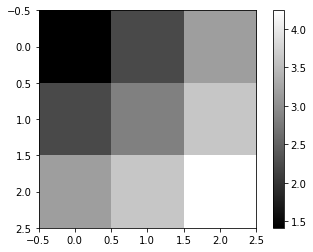

In [145]:
plt.imshow(z, cmap = plt.cm.gray); plt.colorbar()

Text(0.5, 1.0, 'Image plot of $\\sqrt{x^2 + y^2}$ for a grid of values')

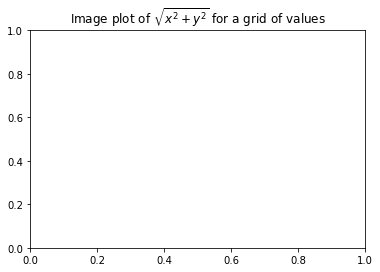

In [147]:
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")

In [148]:
ints = np.array([3,3,3,2,2,1,1,4,4])

In [149]:
np.unique(ints)

array([1, 2, 3, 4])

#### (4) 난수 생성

In [47]:
np.random.randint(3, 10)

5

In [49]:
np.random.randint(3, 10, size = (2,3))

array([[7, 6, 6],
       [9, 6, 4]])

In [50]:
np.random.randn(2,3)

array([[ 0.95711514, -0.99187646,  1.03338478],
       [-0.31449418, -0.49707715, -1.59686264]])

In [52]:
np.random.normal(172, 3, 3)

array([173.73415343, 176.61730949, 171.89932811])

In [53]:
np.random.normal(172, 3, (2,3))

array([[170.87454034, 171.26825395, 174.50317729],
       [172.84820491, 176.38250757, 175.81618778]])

In [55]:
(np.random.normal(172, 3, (2,3)) - 172) / 3

array([[-1.0178831 ,  0.31749222,  0.03592027],
       [-0.45145903, -0.91055551, -0.62541727]])

In [56]:
np.random.randn(2,3)*3 + 172

array([[168.78588021, 175.41995479, 173.84542061],
       [177.52994792, 177.02360167, 172.56750342]])

In [57]:
np.random.uniform(size = (2,3))

array([[0.89759888, 0.8318514 , 0.15809098],
       [0.2163822 , 0.12025689, 0.04109252]])

In [58]:
import random
random.uniform(0, 1)

0.19522993818223633

In [60]:
random.random()

0.10814251648493778

#### (5) 계단 오르내리기 예제

In [72]:
import random

random.seed(12345)
position = 0
walk = [0]
steps = 100
for i in range(steps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)

In [73]:
walk

[0,
 1,
 0,
 1,
 2,
 1,
 2,
 3,
 2,
 3,
 2,
 3,
 4,
 3,
 2,
 3,
 2,
 3,
 2,
 1,
 0,
 -1,
 -2,
 -1,
 0,
 -1,
 0,
 1,
 0,
 1,
 0,
 -1,
 -2,
 -3,
 -2,
 -3,
 -2,
 -3,
 -4,
 -3,
 -4,
 -3,
 -4,
 -5,
 -6,
 -5,
 -6,
 -7,
 -6,
 -5,
 -6,
 -7,
 -8,
 -7,
 -8,
 -9,
 -10,
 -9,
 -8,
 -9,
 -8,
 -7,
 -8,
 -9,
 -10,
 -9,
 -10,
 -9,
 -10,
 -11,
 -10,
 -11,
 -12,
 -11,
 -12,
 -13,
 -12,
 -11,
 -10,
 -11,
 -10,
 -11,
 -12,
 -13,
 -12,
 -13,
 -12,
 -13,
 -14,
 -15,
 -16,
 -15,
 -16,
 -17,
 -18,
 -19,
 -20,
 -19,
 -20,
 -21,
 -20]

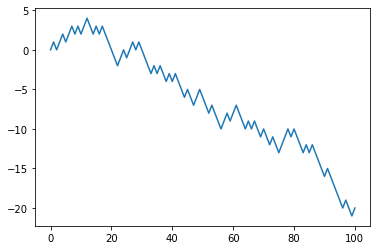

In [74]:
plt.plot(walk)

In [76]:
nsteps = 1000
draws = np.random.randint(0,2, size = nsteps)
draws

array([0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,

In [77]:
steps = np.where(draws > 0, 1, -1)

In [78]:
walk = steps.cumsum()

In [82]:
print(walk.max())
walk.min()

18


-20

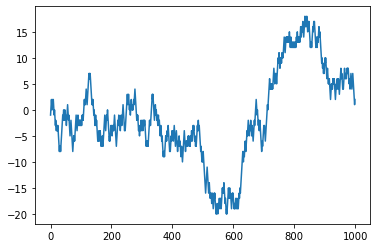

In [83]:
plt.plot(walk)